<a href="https://colab.research.google.com/github/MarcinJanCiesielski/data_science_bootcamp/blob/main/07_Uczenie_glebokie/04_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import bibliotek

In [ ]:
%tensorflow_version 2.x
import numpy as np
import PIL.Image as Image
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import matplotlib.pyplot as plt
print(f'Tensorflow version: {tf.__version__}')
print(f'Tensorflow Hub version: {hub.__version__}')

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Tensorflow version: 2.9.2
Tensorflow Hub version: 0.12.0


#Załadowanie modeli

In [ ]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

#Załadowanie etykiet

In [ ]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())
imagenet_labels

10484/10484 [==============================] - 0s 0us/step


array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

#Załadowanie obrazu

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving th-31822776 to th-31822776


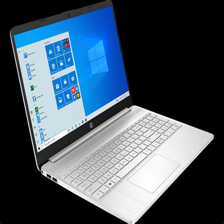

In [ ]:
filename = list(uploaded.keys())[0]
img = Image.open(filename).resize(IMAGE_SHAPE)
img

#Predykcja na podstawie modelu

In [ ]:
img_arr = np.array(img) / 255.0
img_arr = np.expand_dims(img_arr, axis=0)
result = classifier.predict(img_arr)
predicted_class = np.argmax(result[0], axis=-1)
predicted_class_name = imagenet_labels[predicted_class]
predicted_class_name

1/1 [==============================] - 1s 1s/step


'notebook'

#Wyświetlenie predykcji

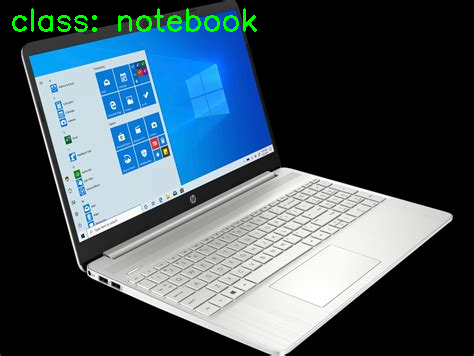

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread(filename)
text = f'class: {predicted_class_name}'
img = cv2.putText(img=img, text=text, org=(10, 30), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 255, 0), thickness=2)
cv2_imshow(img)